In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#package to read xml files
from xml.etree import cElementTree as ET

**Build Table from XML file (Function)**

In [20]:
def read_trackmate_xml_tracks(xml_file):
    """Reads tracks from trackmate xml track file and returns a DataFrame 
    in similar format as the trackmate csv, plus the frame interval is returned"""
    
    tracks = ET.parse(xml_file)
    frame_interval = float(tracks.getroot().attrib["frameInterval"])
    
    attributes = []
    for ti, track in enumerate(tracks.iterfind('particle')):
        for spots in track.iterfind('detection'):
            attributes.append([ti, int(spots.attrib.get('t')),
                                   float(spots.attrib.get('x')),
                                   float(spots.attrib.get('y'))])

    track_table = pd.DataFrame(attributes, columns=['TRACK_ID','FRAME','POSITION_X','POSITION_Y'])
    
    return track_table, frame_interval

**Apply Function to XML files**

In [21]:
filename = 'C:/Users/pcaldas/Desktop/Data Analysis/Methods Paper/data/FtsN WT Cy5 alone p3 Tracks.xml'

table_txy, frame_interval = read_trackmate_xml_tracks(filename)
table_txy.head(10) #take a look at the table format

,TRACK_ID,FRAME,POSITION_X,POSITION_Y
0,0,0,5.276650,12.825664
1,0,1,5.361961,12.614911
2,0,2,4.892001,12.293226
3,0,3,3.952539,12.694436
4,0,4,4.294493,12.443824
5,0,5,4.928865,11.716233
6,0,6,4.433598,11.433916
7,0,7,4.636917,11.808261
8,0,8,3.982284,12.272673
9,0,9,3.962053,12.494078


**Plot Trajectories**

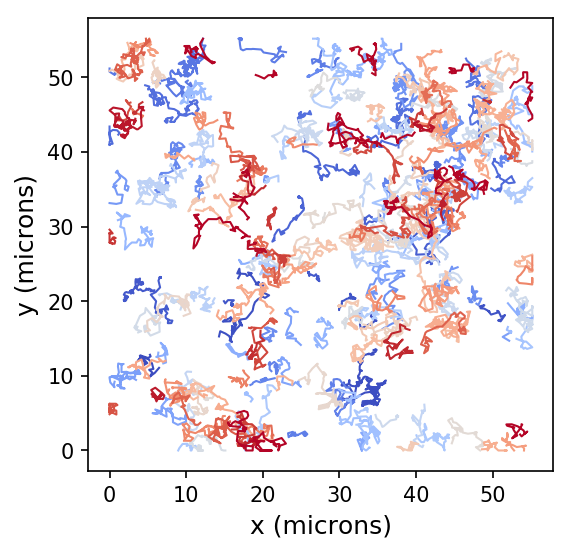

In [31]:
truncate = -1 #truncate number of spots to plot if necessary , -1 plots all spots/trajectories

fig, ax = plt.subplots(figsize=(4,4), dpi =150)

plt.xlabel('x (microns)', fontsize=12)
plt.ylabel('y (microns)', fontsize=12)

#plt.xlim([0,55])
#plt.ylim([0,55])

for groups, columns in table_txy[:truncate].groupby('TRACK_ID'):
    plt.plot(columns['POSITION_X'],columns['POSITION_Y'], lw = 1, color = plt.cm.coolwarm(groups))